# Визуализация с matplotlib

### Цель работы 

Продемонстрировать навыки продвинутой визуализации и форматирования данных с помощью matplotlib.

### Результат 

Файл формата .ipynb, показывающий уровень владения инструментами визуализации.

#### Описание данных

Воспользуемся датасетом `vgsales.csv`. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:

* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

In [1]:
# Импортируем необходимые библиотеки 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Загружаем данные 

df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Построим линейный график динамики объема продаж всех игр жанра "Sports" в Японии.

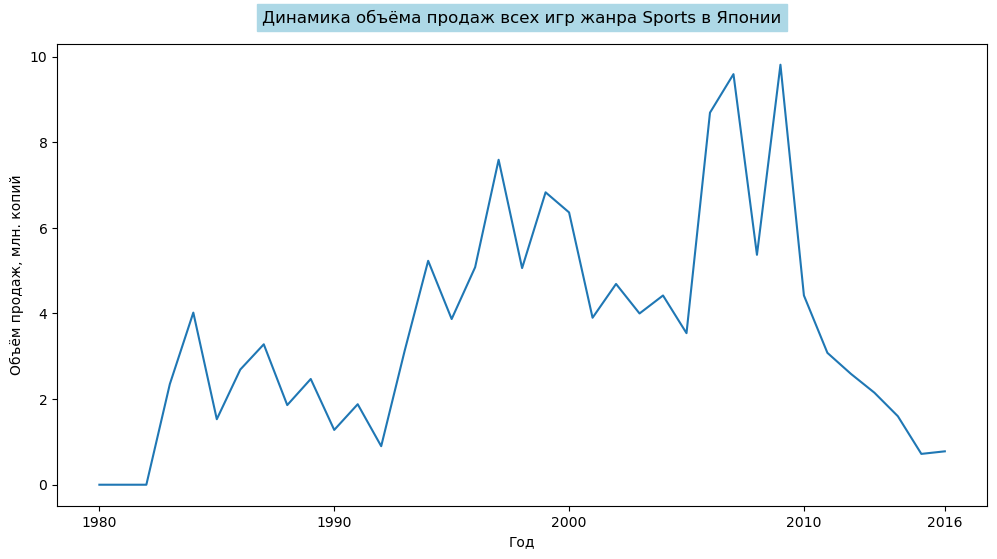

In [3]:
data_1 = df[df['Genre'] == 'Sports'].groupby('Year')['JP_Sales'].sum().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(data_1['Year'], data_1['JP_Sales'])
ax.set_title('Динамика объёма продаж всех игр жанра Sports в Японии', pad=15, backgroundcolor='lightblue')
ax.set_xlabel('Год')
ax.set_ylabel('Объём продаж, млн. копий')

year_list = list(range(int(data_1['Year'].min()), int(data_1['Year'].max()) + 1, 10)) + [int(data_1['Year'].max())]
ax.set_xticks(year_list)

plt.show()

В одних координатных осях построим линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире.

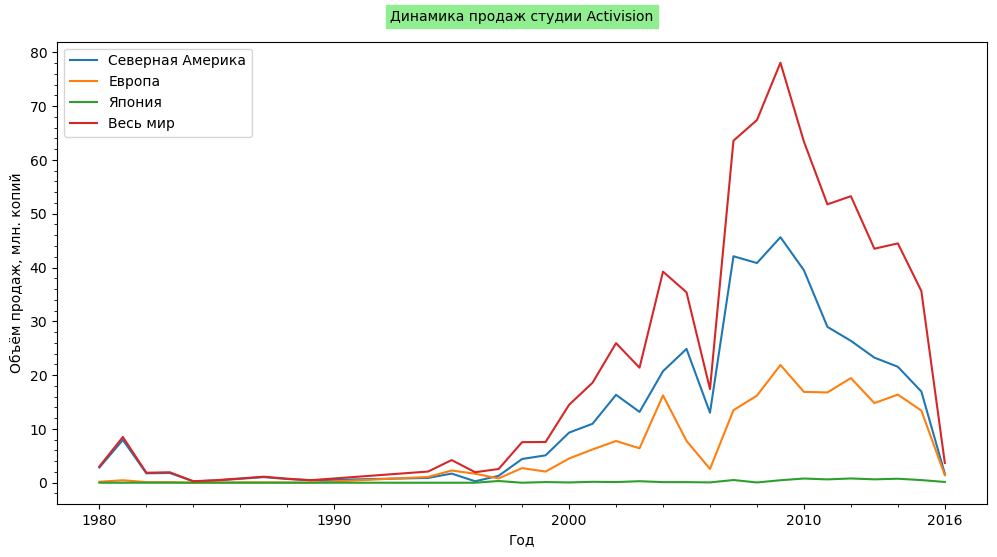

In [4]:
cols = {'NA_Sales':'Северная Америка', 'EU_Sales':'Европа', 'JP_Sales':'Япония', 'Global_Sales':'Весь мир'}

df_activision_grouped_by_year = df[df['Publisher']=='Activision'].groupby('Year')[list(cols)].sum()

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df_activision_grouped_by_year.index, df_activision_grouped_by_year)

ax.set_title('Динамика продаж студии Activision', pad=15, backgroundcolor='lightgreen', fontsize=10)
ax.set_xlabel('Год')
ax.set_ylabel('Объём продаж, млн. копий')
ax.legend(list(cols.values()))
ax.set_xticks(list(range(int(df_activision_grouped_by_year.index.min()), 
                         int(df_activision_grouped_by_year.index.max()), 10)) 
              + [df_activision_grouped_by_year.index.max()])
ax.minorticks_on()

plt.show()

Далее построим линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на разных координатных осях.

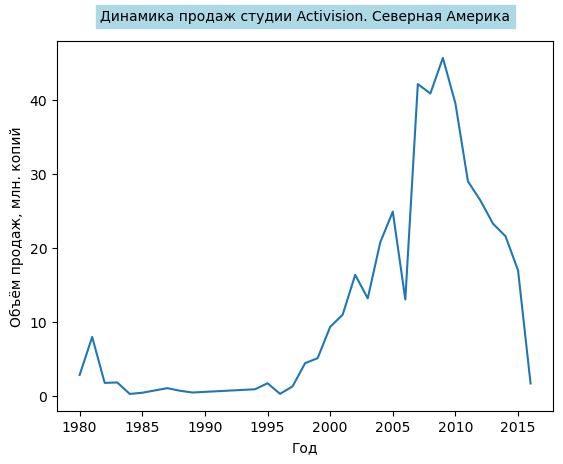

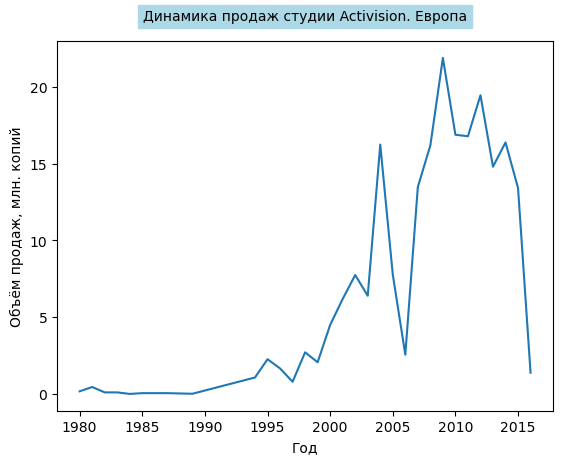

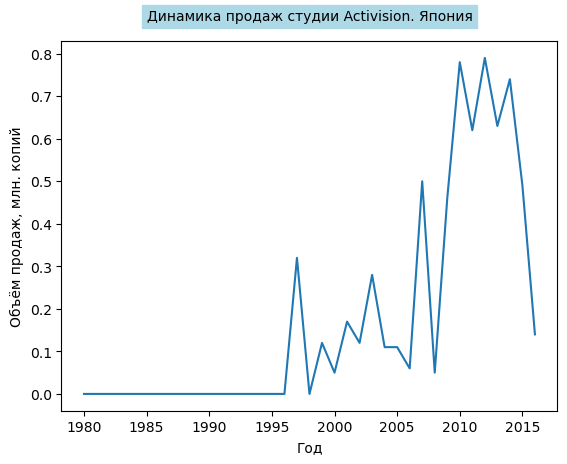

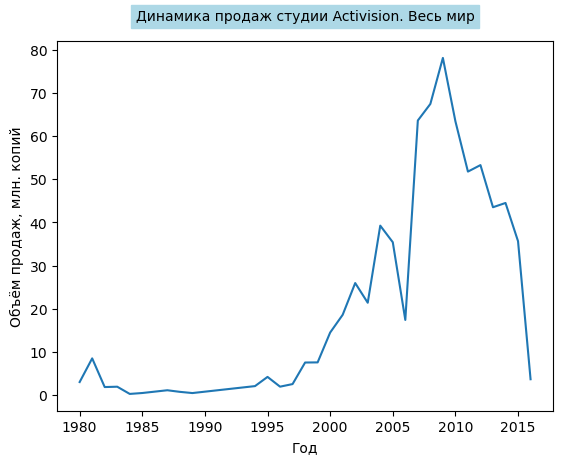

In [5]:
list_of_elements = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
parts_of_world = ['Северная Америка', 'Европа', 'Япония', 'Весь мир']
count = 0

for i_elem in list_of_elements:

    fig, ax = plt.subplots()

    data = df[df['Publisher'] == 'Activision'].groupby('Year')[i_elem].sum().reset_index()

    ax.plot(data['Year'], data[i_elem])
    ax.set_title('Динамика продаж студии Activision. ' + parts_of_world[count], 
                 pad=15, backgroundcolor='lightblue', fontsize=10)
    ax.set_xlabel('Год')
    ax.set_ylabel('Объём продаж, млн. копий')
    
    count += 1

    plt.show()

Построим такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика.

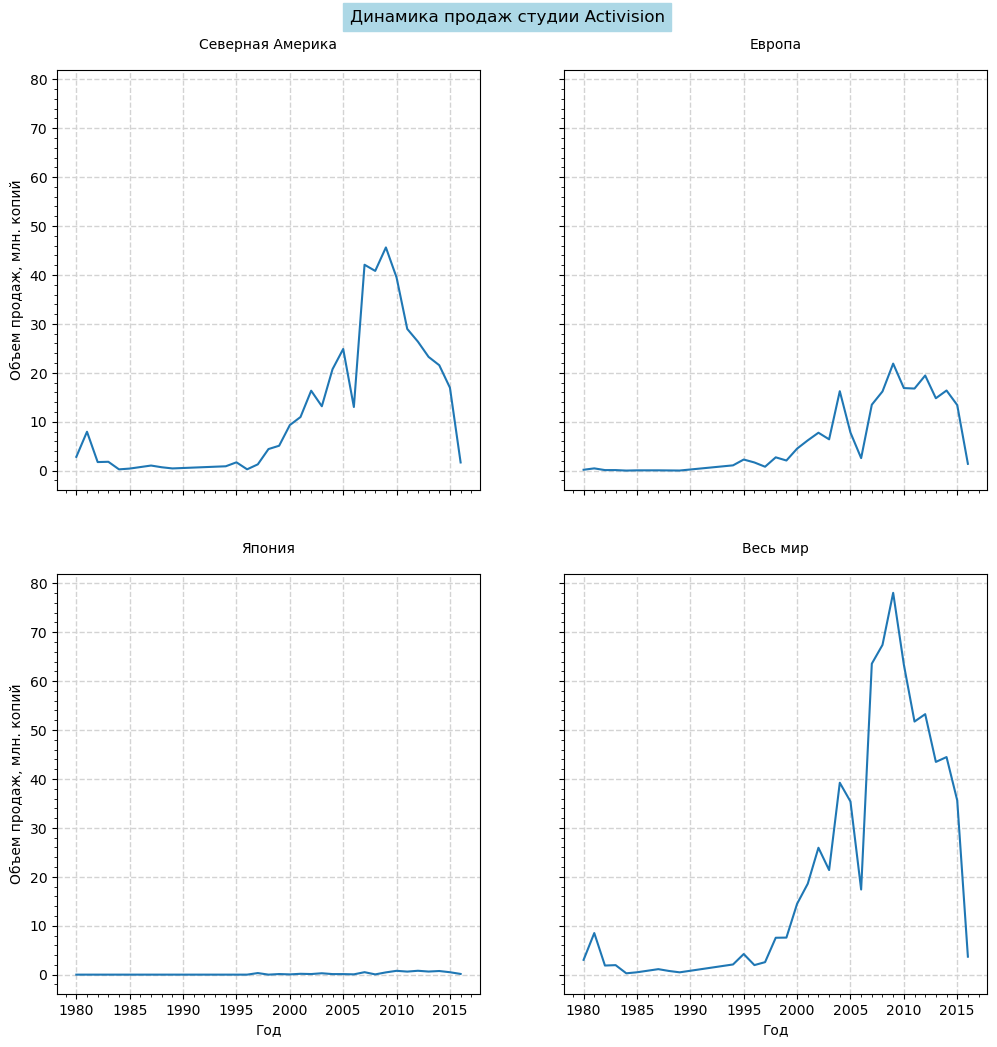

In [6]:
cols = {'NA_Sales':'Северная Америка', 'EU_Sales':'Европа', 'JP_Sales':'Япония', 'Global_Sales':'Весь мир'}
df_activision_grouped_by_year = df[df['Publisher']=='Activision'].groupby('Year')[list(cols)].sum()

fig, axs = plt.subplots(figsize=(12, 12), ncols=2, nrows=2, sharex=True, sharey=True)
fig.suptitle('Динамика продаж студии Activision', y=0.93, backgroundcolor='lightblue')

axs_flatten = axs.flatten()

for col_index, col_name in enumerate(cols):
    ax = axs_flatten[col_index]
    ax.plot(df_activision_grouped_by_year.index, df_activision_grouped_by_year[col_name])
    ax.set_title(cols[col_name], pad=15, fontsize=10)
    ax.grid(linewidth=1, color='lightgray', linestyle='--')
    
    if ax in axs[-1]:
        ax.set_xlabel('Год')
    if ax in [ax_row[0] for ax_row in axs]:
        ax.set_ylabel('Объем продаж, млн. копий')
        
    ax.minorticks_on()
    
plt.show()

В одной координатной сетке построим 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год).

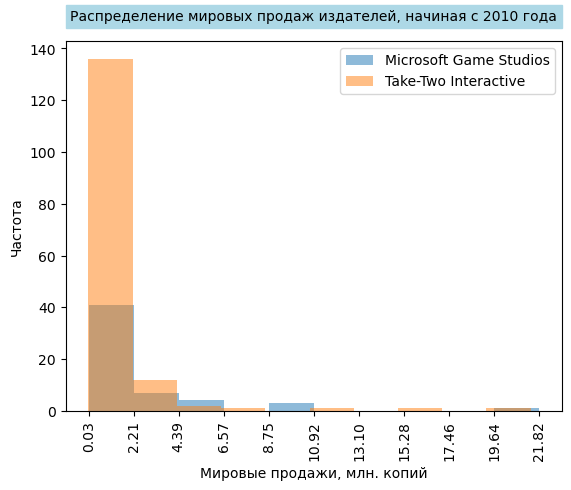

In [7]:
fig, ax = plt.subplots()

data_1 = df[(df['Publisher'] == 'Microsoft Game Studios') & (df['Year'] >= 2010)]['Global_Sales']
data_2 = df[(df['Publisher'] == 'Take-Two Interactive') & (df['Year'] >= 2010)]['Global_Sales']

_, bins, _ = ax.hist(data_1, label='Microsoft Game Studios', alpha=0.5)
ax.hist(data_2, label='Take-Two Interactive', alpha=0.5)

ax.set_title('Распределение мировых продаж издателей, начиная с 2010 года', 
             pad=15, backgroundcolor='lightblue', fontsize=10)
ax.set_xlabel('Мировые продажи, млн. копий')
ax.set_ylabel('Частота')
ax.set_xticks(list(bins))
ax.tick_params(axis='x', rotation=90)
ax.legend()

plt.show()

Определим 5 платформ, для которых в Японии было продано больше всего игр за все время. Столбец с самым высоким значением окрасим зеленым, а с самым низким - красным.

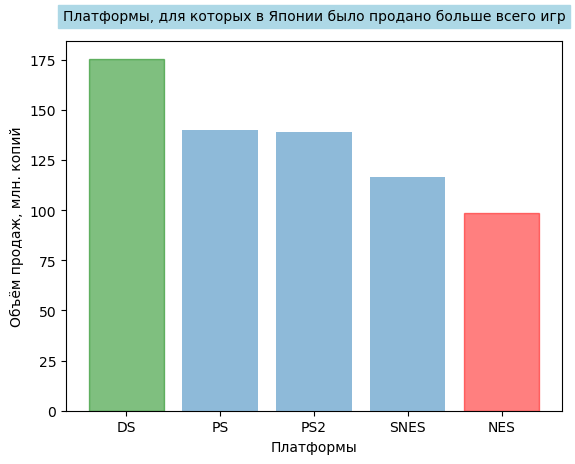

In [8]:
fig, ax = plt.subplots()

df_6 = df.groupby('Platform')['JP_Sales'].sum().sort_values(ascending=False).reset_index().head()

patches = ax.bar(df_6['Platform'], df_6['JP_Sales'], alpha=0.5)
    
patches[0].set_color('green')
patches[4].set_color('red')

ax.set_title('Платформы, для которых в Японии было продано больше всего игр', 
             pad=15, backgroundcolor='lightblue', fontsize=10)
ax.set_xlabel('Платформы')
ax.set_ylabel('Объём продаж, млн. копий')

plt.show()

Построим линейный график динамики количества игр, выпускаемых Nintendo, по годам. Определим промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветим этот промежуток времени с помощью зеленого полупрозрачного прямоугольника.

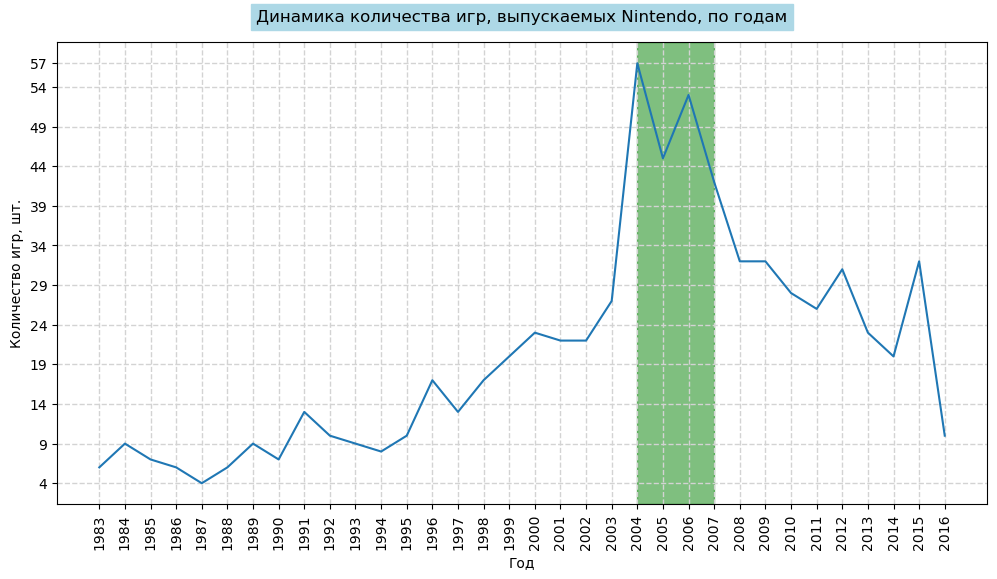

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))

data_7 = df[df['Publisher'] == 'Nintendo'].groupby('Year')['Publisher'].count().reset_index()

ax.axvspan(xmin = data_7[data_7['Publisher'] > 35]['Year'].min(), 
           xmax = data_7[data_7['Publisher'] > 35]['Year'].max(), 
           color='green', 
           alpha=0.5)

ax.plot(data_7['Year'], data_7['Publisher'])

ax.set_title('Динамика количества игр, выпускаемых Nintendo, по годам', pad=15, backgroundcolor='lightblue')
ax.set_xlabel('Год')
ax.set_ylabel('Количество игр, шт.')

year_list = list(range(int(data_7['Year'].min()), int(data_7['Year'].max()) + 1))
ax.set_xticks(year_list)

number_list = list(range(data_7['Publisher'].min(), data_7['Publisher'].max() + 1, 5))
number_list.append(data_7['Publisher'].max())
ax.set_yticks(number_list)

ax.tick_params(axis='x', rotation=90)
ax.grid(linewidth=1, color='lightgray', linestyle='--')

plt.show()

Определим 3 жанра и 4 издателя с самыми большими продажами игр в мире за все время. Построим сетку графиков 4 на 3, в каждой ячейке построим точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель).

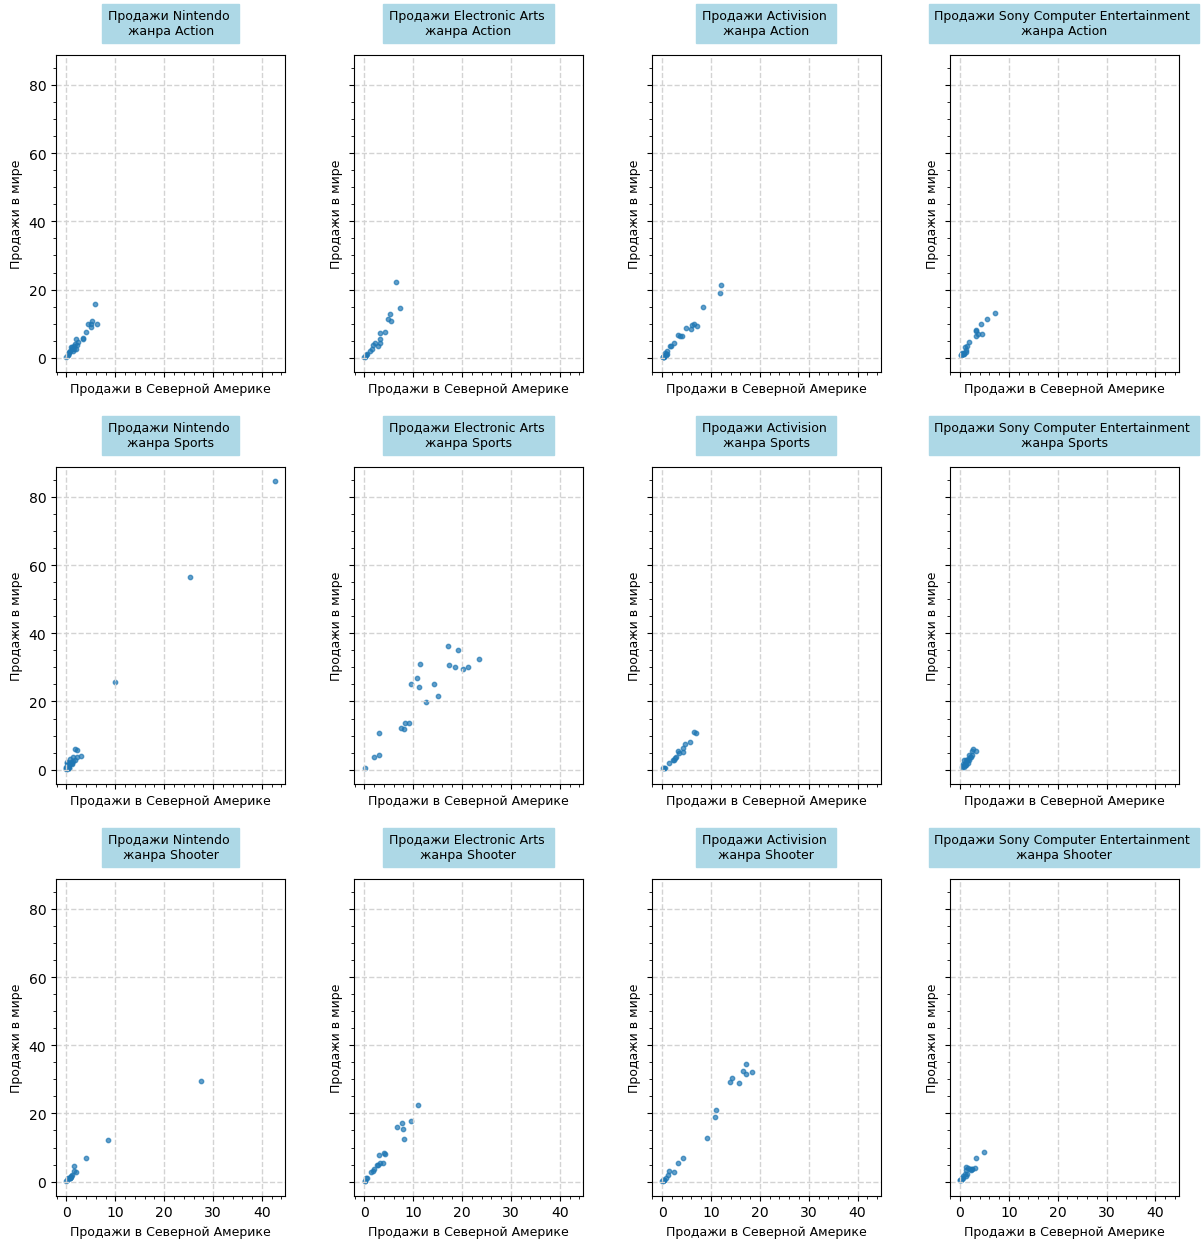

In [11]:
fig, axs = plt.subplots(figsize=(12, 12), ncols = 4, nrows = 3, sharex=True, sharey=True)

fig.tight_layout(h_pad=2)

top_3_genre = df.groupby('Genre')['Global_Sales', 
                             'NA_Sales'].sum().sort_values('Global_Sales', ascending=False).reset_index().head(3)

top_4_publisher = df.groupby('Publisher')['Global_Sales', 
                             'NA_Sales'].sum().sort_values('Global_Sales', ascending=False).reset_index().head(4)

for i, genre in enumerate(top_3_genre['Genre']):
    for j, publisher in enumerate(top_4_publisher['Publisher']):
       
        data = df[(df['Publisher'] == publisher) & (df['Genre'] == genre)].groupby('Year')[['NA_Sales', 
                             'Global_Sales']].sum().reset_index()
        ax = axs[i][j]
        ax.scatter(data['NA_Sales'], data['Global_Sales'], s=10, alpha=0.7)
        ax.set_title(f'Продажи {publisher} \nжанра {genre}', y=1, fontsize=9, pad=15, backgroundcolor='lightblue')
        ax.set_xlabel('Продажи в Северной Америке', fontsize=9)
        ax.set_ylabel('Продажи в мире', fontsize=9)
        ax.grid(linewidth=1, color='lightgray', linestyle='--')
        
        ax.minorticks_on()

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()